In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# **Read and EDA**

In [2]:
data = pd.read_csv('EastWestAirlines.csv')
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
data.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [6]:
data.shape

(3999, 12)

In [7]:
np.unique(data.Award, return_counts=True)

(array([0, 1]), array([2518, 1481]))

In [8]:
np.unique(data.cc1_miles, return_counts=True)

(array([1, 2, 3, 4, 5]), array([2289,  284,  613,  525,  288]))

In [9]:
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [10]:
data = data.drop('ID',  axis =1)

In [11]:
print(len(data['Bonus_miles'].unique()))
len(data['Balance'].unique())

2734


3904

Spliting Data to nuemerical and Categorical for **EDA**

In [12]:
data_num = [x for x in data.columns if len(data[x].unique()) > 10]
data_cat = [x for x in data.columns if len(data[x].unique()) < 10]

In [13]:
data_num

['Balance',
 'Qual_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll']

In [14]:
data_cat

['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award']

Histogram of nuemerical columns in dataset

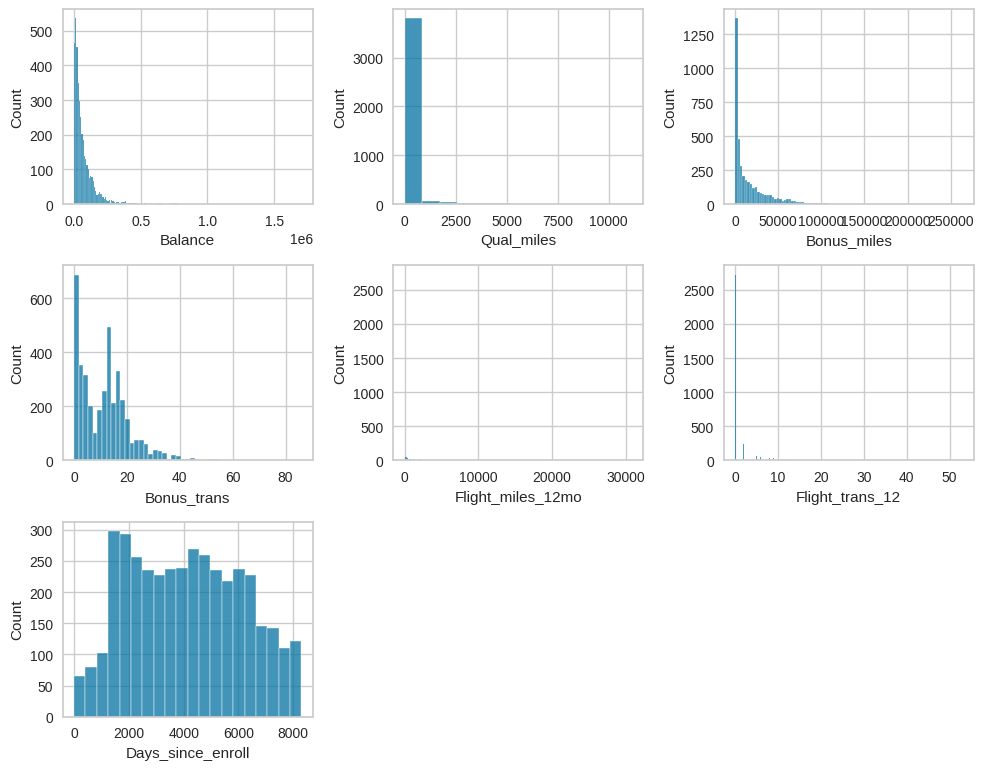

In [17]:
k = 1
plt.figure(figsize=(10,10))
for i in data.loc[:, data_num]:
    plt.subplot(4,3,k)
    sns.histplot(data[i])
    plt.tight_layout()
    k+=1


# **Boxplot of categorical columns in dataset**

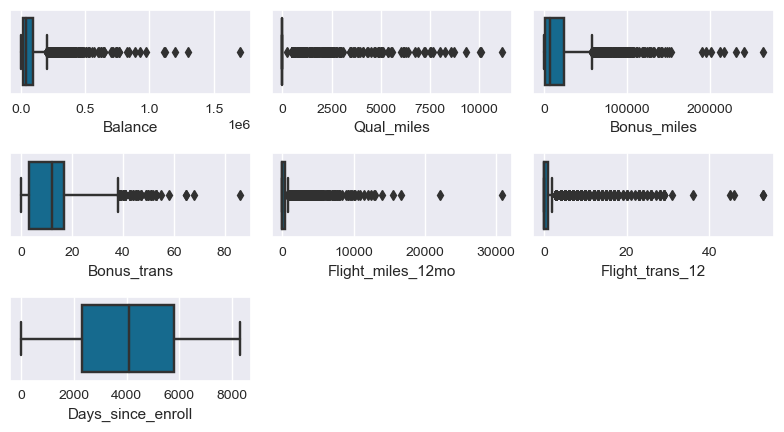

In [ ]:
k = 1
for x in data.loc[:, data_num]:
    plt.subplot(4, 3, k)
    sns.boxplot(x = x, data= data.loc[:, data_num])
    plt.tight_layout()
    k +=1

# **Recognizing Outliers in columns**

In [18]:
for x in data.loc[:, data_num]:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    up = Q3 + (1.5 * IQR)
    down = Q1 - (1.5 * IQR)
    if data[(data[x] > up) | (data[x] < down)].any(axis=None):
        print(x, 'Yes')
    else:
        print(x, 'No')

Balance Yes
Qual_miles Yes
Bonus_miles Yes
Bonus_trans Yes
Flight_miles_12mo Yes
Flight_trans_12 Yes
Days_since_enroll No


# **Remove outliers**

In [19]:
#Remove outliers
out_list=["Bonus_trans","Flight_miles_12mo","Flight_trans_12", "Bonus_miles", "Flight_trans_12"]
for x in data.loc[:,out_list]:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR= Q3 - Q1
    up = Q3 + 1.5 * IQR
    down = Q1 - 1.5 * IQR
    data.loc[data[x] > up,x] = up
    data.loc[data[x] < down,x] = down

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.00
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.00
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.00
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.00
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.00
Bonus_miles,3999.0,15410.730683,18074.733482,0.0,1250.0,7171.0,23800.5,57626.25
Bonus_trans,3999.0,11.470618,9.115104,0.0,3.0,12.0,17.0,38.00
Flight_miles_12mo,3999.0,178.055639,294.678028,0.0,0.0,0.0,311.0,777.50
Flight_trans_12,3999.0,0.591523,0.944826,0.0,0.0,0.0,1.0,2.50
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.00


**I removed the outliers. It's not the best approach we can use, but it is better than nothing.**

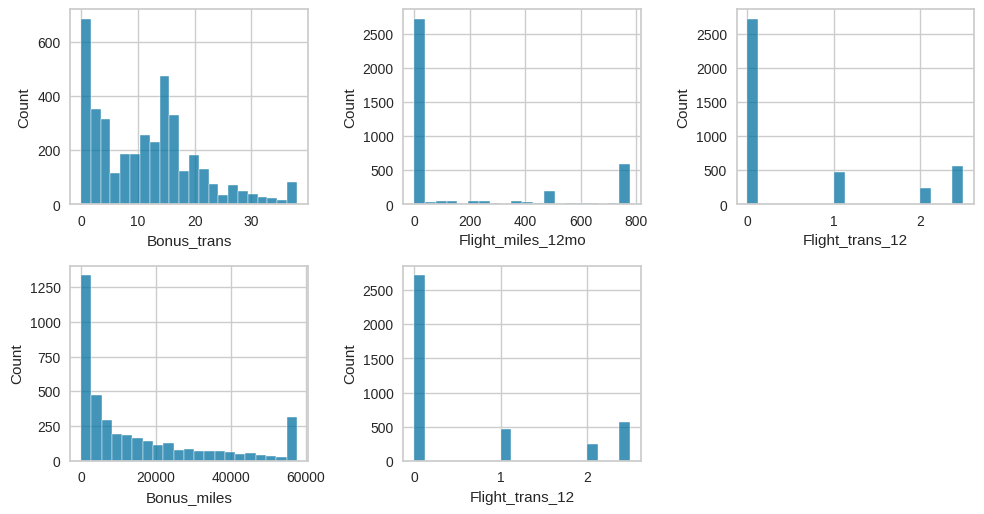

In [21]:
k = 1
plt.figure(figsize=(10, 10))
for x in data.loc[:, out_list]:
    plt.subplot(4, 3, k)
    sns.histplot(data[x])
    plt.tight_layout()
    k+=1

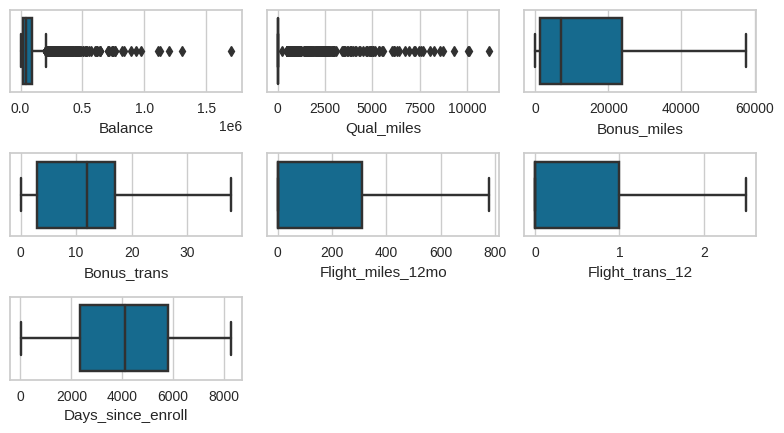

In [22]:
k = 1
for x in data.loc[:, data_num]:
    plt.subplot(4, 3, k)
    sns.boxplot(x = x, data= data.loc[:, data_num])
    plt.tight_layout()
    k +=1

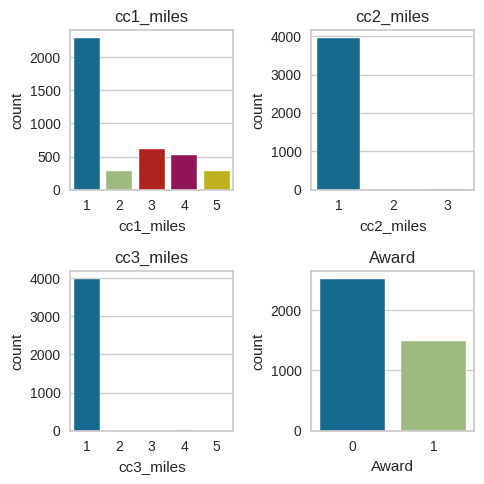

In [23]:
k = 1
plt.figure(figsize=(5,5))
for i in data_cat:
    plt.subplot(2, 2, k)
    sns.countplot(x=i, data = data.loc[:, data_cat])
    plt.title(i)
    plt.tight_layout()
    k +=1

# **Recognizing the relationships between columns**

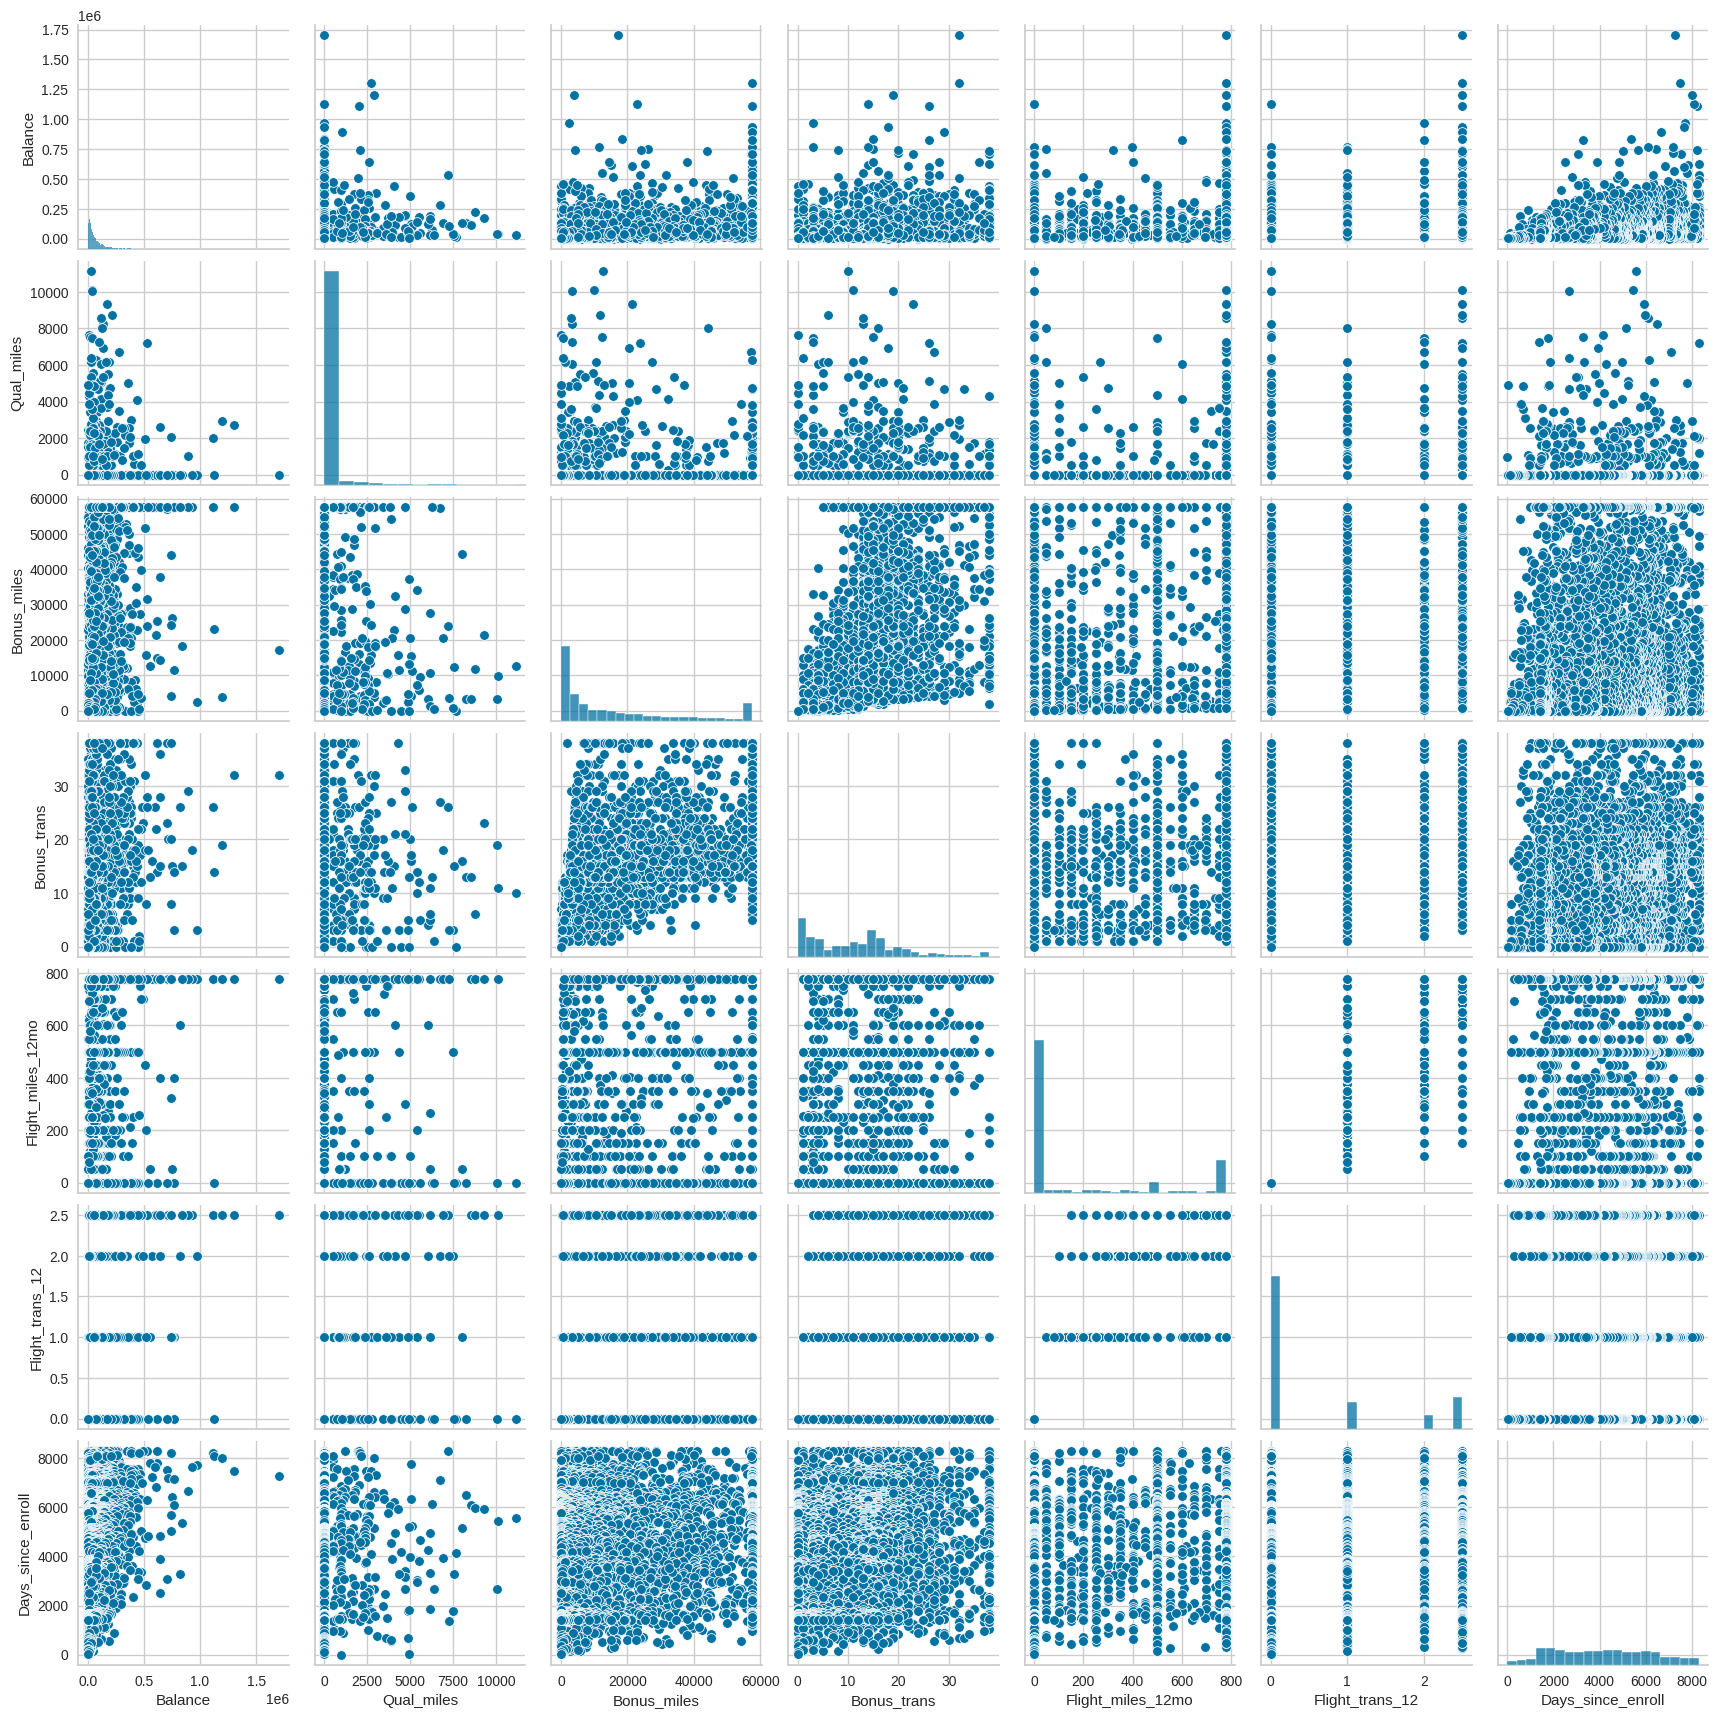

In [24]:
sns.pairplot(data=data.loc[:, data_num])

<AxesSubplot:>

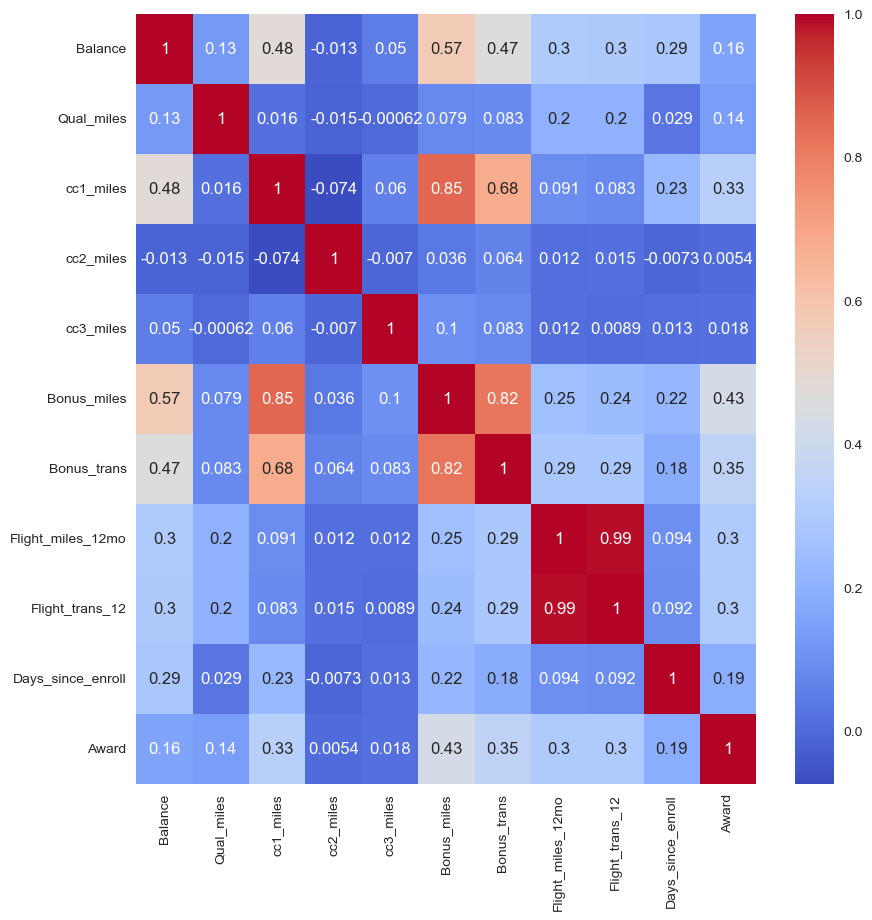

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='spearman'), annot=True,cmap="coolwarm")

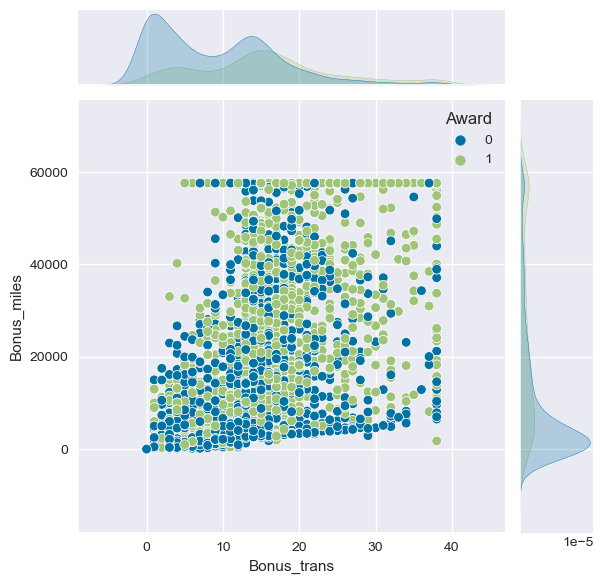

In [ ]:
sns.jointplot(y ='Bonus_miles', x ='Bonus_trans', data = data , hue='Award')

# **Creating Clustering Alghoritms**

In [25]:
X = data.drop('Award', axis = 1)
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174.0,1,0.0,0.0,7000
1,19244,0,1,1,1,215.0,2,0.0,0.0,6968
2,41354,0,1,1,1,4123.0,4,0.0,0.0,7034
3,14776,0,1,1,1,500.0,1,0.0,0.0,6952
4,97752,0,4,1,1,43300.0,26,777.5,2.5,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525.0,4,200.0,1.0,1403
3995,64385,0,1,1,1,981.0,5,0.0,0.0,1395
3996,73597,0,3,1,1,25447.0,8,0.0,0.0,1402
3997,54899,0,1,1,1,500.0,1,500.0,1.0,1401


In [26]:
score = []
x = range(2, 10)
for i in x:
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=42, verbose=5)
    kmean.fit(X)
    score.append(kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 20749370617691.75.
Iteration 1, inertia 19898731181500.41.
Iteration 2, inertia 19896982583511.11.
Iteration 3, inertia 19896401896702.895.
Iteration 4, inertia 19896007184068.477.
Iteration 5, inertia 19895945791583.496.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 31246376771695.5.
Iteration 1, inertia 24911642598050.11.
Iteration 2, inertia 22678511087331.75.
Iteration 3, inertia 21540779429203.78.
Iteration 4, inertia 20937995010075.977.
Iteration 5, inertia 20523516067381.055.
Iteration 6, inertia 20212808563218.867.
Iteration 7, inertia 20042393965101.016.
Iteration 8, inertia 19968461737251.312.
Iteration 9, inertia 19938754009474.344.
Iteration 10, inertia 19914841670920.12.
Iteration 11, inertia 19899170017438.582.
Iteration 12, inertia 19896006084905.64.
Iteration 13, inertia 19895945791583.496.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Converged at iteration 9: center shift 54836.52817627888 within tolerance 104847.58394815706.
Initialization complete
Iteration 0, inertia 13454461262548.438.
Iteration 1, inertia 11275209200621.84.
Iteration 2, inertia 11034059865184.516.
Iteration 3, inertia 10976912629828.996.
Iteration 4, inertia 10968247838519.984.
Iteration 5, inertia 10967161046082.5.
Iteration 6, inertia 10966906578316.695.
Converged at iteration 6: center shift 68235.05529542985 within tolerance 104847.58394815706.
Initialization complete
Iteration 0, inertia 13519286120859.0.
Iteration 1, inertia 11192189183477.705.
Iteration 2, inertia 11033460292091.426.
Iteration 3, inertia 10982168174534.322.
Iteration 4, inertia 10965444027927.176.
Iteration 5, inertia 10950592718919.436.
Iteration 6, inertia 10931449527379.719.
Iteration 7, inertia 10920425473374.922.
Iteration 8, inertia 10918639813853.646.
Converged at iteration 8: center shift 49436.99001972832 within tolerance 104847.58394815706.
Initialization comp

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 6, inertia 6724891673448.509.
Iteration 7, inertia 6721512866382.342.
Iteration 8, inertia 6718811387221.257.
Iteration 9, inertia 6717581306518.6455.
Iteration 10, inertia 6715602736949.715.
Iteration 11, inertia 6712862853715.704.
Iteration 12, inertia 6711678414245.488.
Iteration 13, inertia 6710952357672.466.
Iteration 14, inertia 6710354972343.907.
Iteration 15, inertia 6710171965643.064.
Iteration 16, inertia 6709939668419.348.
Iteration 17, inertia 6709663914293.08.
Iteration 18, inertia 6709201610024.721.
Iteration 19, inertia 6708444002329.475.
Iteration 20, inertia 6708013903967.109.
Iteration 21, inertia 6707803904514.643.
Converged at iteration 21: center shift 11841.474228531515 within tolerance 104847.58394815706.
Initialization complete
Iteration 0, inertia 13674615210619.688.
Iteration 1, inertia 8353390403793.922.
Iteration 2, inertia 7361238463067.838.
Iteration 3, inertia 6872150243764.555.
Iteration 4, inertia 6806713589723.334.
Iteration 5, inertia 676019

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1, inertia 6450186897213.834.
Iteration 2, inertia 6007810445529.213.
Iteration 3, inertia 5592585895039.425.
Iteration 4, inertia 5271880230046.331.
Iteration 5, inertia 5143364500015.122.
Iteration 6, inertia 5068511755556.858.
Iteration 7, inertia 5034169938944.717.
Iteration 8, inertia 5017558686066.77.
Iteration 9, inertia 5003006225587.267.
Iteration 10, inertia 4994440568238.33.
Iteration 11, inertia 4987425910564.338.
Iteration 12, inertia 4980407341053.709.
Iteration 13, inertia 4970054728636.5.
Iteration 14, inertia 4964478072475.541.
Iteration 15, inertia 4960650504239.647.
Iteration 16, inertia 4960091900224.914.
Iteration 17, inertia 4959795364024.208.
Converged at iteration 17: center shift 66744.6837858234 within tolerance 104847.58394815706.
Initialization complete
Iteration 0, inertia 6365677359702.1875.
Iteration 1, inertia 5009276255357.129.
Iteration 2, inertia 4973676997252.729.
Iteration 3, inertia 4963062600031.725.
Iteration 4, inertia 4959802017537.55

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Iteration 41, inertia 3718630059261.452.
Converged at iteration 41: center shift 83499.21603133577 within tolerance 104847.58394815706.
Initialization complete
Iteration 0, inertia 4849838126400.5.
Iteration 1, inertia 3873081898183.737.
Iteration 2, inertia 3782280694909.29.
Iteration 3, inertia 3746286718960.7603.
Iteration 4, inertia 3739124321378.796.
Iteration 5, inertia 3738064814779.972.
Iteration 6, inertia 3737337961656.952.
Iteration 7, inertia 3737052141202.8193.
Iteration 8, inertia 3736880452790.111.
Converged at iteration 8: center shift 83499.21603133576 within tolerance 104847.58394815706.
Initialization complete
Iteration 0, inertia 5121424247268.4375.
Iteration 1, inertia 3883018443485.9453.
Iteration 2, inertia 3822856951104.2554.
Iteration 3, inertia 3790603887979.4995.
Iteration 4, inertia 3771916268347.915.
Iteration 5, inertia 3760803305609.154.
Iteration 6, inertia 3748199208522.1904.
Iteration 7, inertia 3742826942354.1055.
Iteration 8, inertia 3737787270027.4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1, inertia 3561525823108.105.
Iteration 2, inertia 3461587825246.718.
Iteration 3, inertia 3421779548255.8506.
Iteration 4, inertia 3389818367522.333.
Iteration 5, inertia 3335091531163.46.
Iteration 6, inertia 3279409409743.2397.
Iteration 7, inertia 3228706612652.876.
Iteration 8, inertia 3168036186277.574.
Iteration 9, inertia 3108779178175.8506.
Iteration 10, inertia 3055537047605.3423.
Iteration 11, inertia 3024893383865.002.
Iteration 12, inertia 3011942847039.2017.
Iteration 13, inertia 2992916916237.58.
Iteration 14, inertia 2965463516069.9795.
Iteration 15, inertia 2956910625394.605.
Iteration 16, inertia 2952492442355.338.
Iteration 17, inertia 2946244674668.8696.
Iteration 18, inertia 2930367649991.7.
Iteration 19, inertia 2916538050743.408.
Iteration 20, inertia 2889808450640.371.
Iteration 21, inertia 2881297714747.6094.
Iteration 22, inertia 2878555120363.2036.
Iteration 23, inertia 2876589771676.9116.
Iteration 24, inertia 2875461468325.485.
Iteration 25, inert

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3538826662517.0.
Iteration 1, inertia 2763143433365.0225.
Iteration 2, inertia 2707129480416.452.
Iteration 3, inertia 2702633488175.073.
Iteration 4, inertia 2693902358113.2305.
Iteration 5, inertia 2687529496692.8687.
Iteration 6, inertia 2670599079980.965.
Iteration 7, inertia 2666508099698.426.
Iteration 8, inertia 2666326068670.256.
Iteration 9, inertia 2666136039490.621.
Converged at iteration 9: center shift 73768.12604332418 within tolerance 104847.58394815706.
Initialization complete
Iteration 0, inertia 4323635438409.5.
Iteration 1, inertia 3602017877777.1455.
Iteration 2, inertia 3491484119425.7764.
Iteration 3, inertia 3423367198376.258.
Iteration 4, inertia 3372572325137.9307.
Iteration 5, inertia 3331935958406.9277.
Iteration 6, inertia 3280708980448.8257.
Iteration 7, inertia 3199217303354.5015.
Iteration 8, inertia 3153853890304.873.
Iteration 9, inertia 3109729831920.0234.
Iteration 10, inertia 3062910643243.2437.
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 3300108772963.875.
Iteration 1, inertia 2302029832000.207.
Iteration 2, inertia 2251647561825.4653.
Iteration 3, inertia 2242669714379.008.
Iteration 4, inertia 2239761121719.0557.
Iteration 5, inertia 2237561446235.16.
Iteration 6, inertia 2235825314630.536.
Iteration 7, inertia 2234553830020.163.
Iteration 8, inertia 2232673997625.076.
Iteration 9, inertia 2231535642890.487.
Iteration 10, inertia 2230814345252.579.
Iteration 11, inertia 2230090061158.792.
Iteration 12, inertia 2229190149139.0435.
Iteration 13, inertia 2228300788846.4355.
Iteration 14, inertia 2227629629348.709.
Iteration 15, inertia 2227183933759.015.
Iteration 16, inertia 2227017540239.5796.
Iteration 17, inertia 2226591956990.129.
Iteration 18, inertia 2226241552575.253.
Iteration 19, inertia 2226085681749.8066.
Converged at iteration 19: center shift 43833.70764547872 within tolerance 104847.58394815706.
Initialization complete
Iteration 0, inertia 3062699192711.6875.
Iteration 1, inertia 2327

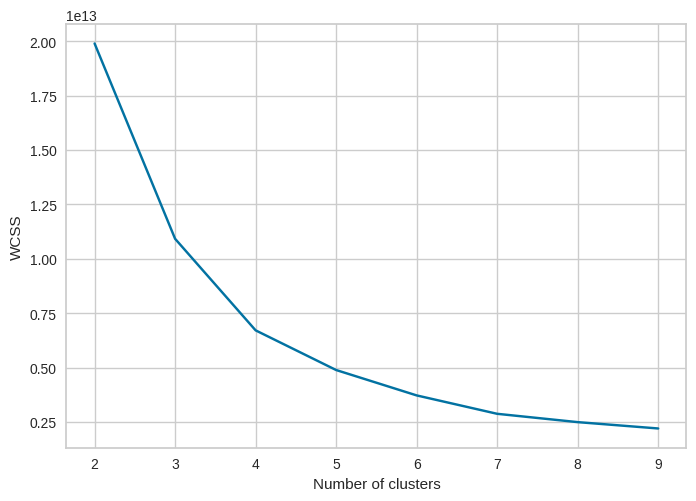

In [27]:
plt.plot(range(2, 10), score)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

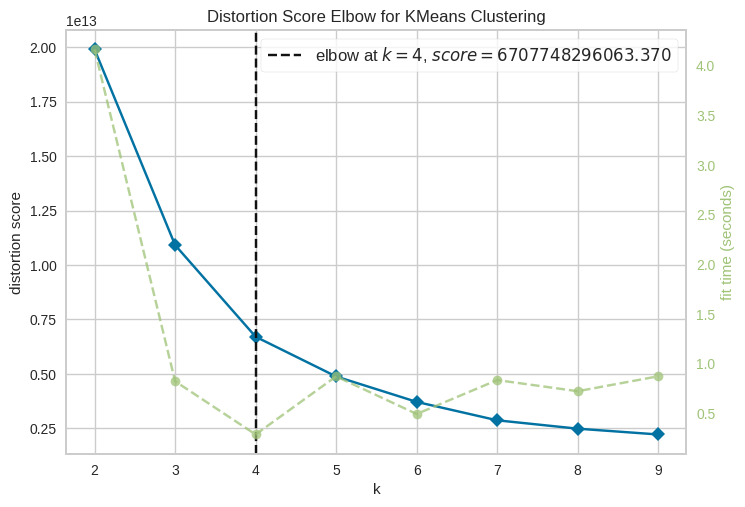

In [28]:
kmean = KMeans()
visualizer = KElbowVisualizer(kmean, k=range(2, 10), )
visualizer.fit(X)
visualizer.poof()
plt.show()

In [29]:
kmean = KMeans(n_clusters=4, verbose=5, max_iter = 500, random_state =42)
kmean.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 8005428723220.5.
Iteration 1, inertia 6819561801540.498.
Iteration 2, inertia 6767470916500.74.
Iteration 3, inertia 6747831270601.375.
Iteration 4, inertia 6735087819376.687.
Iteration 5, inertia 6729518796312.827.
Iteration 6, inertia 6724891673448.509.
Iteration 7, inertia 6721512866382.342.
Iteration 8, inertia 6718811387221.257.
Iteration 9, inertia 6717581306518.6455.
Iteration 10, inertia 6715602736949.715.
Iteration 11, inertia 6712862853715.704.
Iteration 12, inertia 6711678414245.488.
Iteration 13, inertia 6710952357672.466.
Iteration 14, inertia 6710354972343.907.
Iteration 15, inertia 6710171965643.064.
Iteration 16, inertia 6709939668419.348.
Iteration 17, inertia 6709663914293.08.
Iteration 18, inertia 6709201610024.721.
Iteration 19, inertia 6708444002329.475.
Iteration 20, inertia 6708013903967.109.
Iteration 21, inertia 6707803904514.643.
Converged at iteration 21: center shift 11841.474228531515 within tolerance 104847.5839

KMeans(max_iter=500, n_clusters=4, random_state=42, verbose=5)

In [77]:
X['cluster_kmeans'] = kmean.labels_
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster,cluster_kmeans
0,28143,0,1,1,1,174.0,1,0.0,0.0,7000,0,0
1,19244,0,1,1,1,215.0,2,0.0,0.0,6968,0,0
2,41354,0,1,1,1,4123.0,4,0.0,0.0,7034,0,0
3,14776,0,1,1,1,500.0,1,0.0,0.0,6952,0,0
4,97752,0,4,1,1,43300.0,26,777.5,2.5,6935,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525.0,4,200.0,1.0,1403,0,0
3995,64385,0,1,1,1,981.0,5,0.0,0.0,1395,0,0
3996,73597,0,3,1,1,25447.0,8,0.0,0.0,1402,0,0
3997,54899,0,1,1,1,500.0,1,500.0,1.0,1401,0,0


In [78]:
X.cluster.value_counts()

0    2816
3     972
1     185
2      26
Name: cluster, dtype: int64

In [79]:
silhouette_score(X, X['cluster'])

0.598881362185267

The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1

In [47]:
data = data.drop('Award', axis = 1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174.0,1,0.0,0.0,7000
1,19244,0,1,1,1,215.0,2,0.0,0.0,6968
2,41354,0,1,1,1,4123.0,4,0.0,0.0,7034
3,14776,0,1,1,1,500.0,1,0.0,0.0,6952
4,97752,0,4,1,1,43300.0,26,777.5,2.5,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525.0,4,200.0,1.0,1403
3995,64385,0,1,1,1,981.0,5,0.0,0.0,1395
3996,73597,0,3,1,1,25447.0,8,0.0,0.0,1402
3997,54899,0,1,1,1,500.0,1,500.0,1.0,1401


In [80]:
bandwidth = estimate_bandwidth(data, quantile=0.4, n_samples=1000)

In [83]:
MeanShift= MeanShift(bandwidth=bandwidth, bin_seeding=True)
MeanShift.fit(data)

MeanShift(bandwidth=61210.50866569904, bin_seeding=True)

In [84]:
MeanShift.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
np.unique(MeanShift.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [86]:
silhouette_score(X, MeanShift.labels_)

0.7061056715102653

In [87]:
X['cluster_meanshift']=MeanShift.labels_

In [88]:
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster,cluster_kmeans,cluster_meanshift
0,28143,0,1,1,1,174.0,1,0.0,0.0,7000,0,0,0
1,19244,0,1,1,1,215.0,2,0.0,0.0,6968,0,0,0
2,41354,0,1,1,1,4123.0,4,0.0,0.0,7034,0,0,0
3,14776,0,1,1,1,500.0,1,0.0,0.0,6952,0,0,0
4,97752,0,4,1,1,43300.0,26,777.5,2.5,6935,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525.0,4,200.0,1.0,1403,0,0,0
3995,64385,0,1,1,1,981.0,5,0.0,0.0,1395,0,0,0
3996,73597,0,3,1,1,25447.0,8,0.0,0.0,1402,0,0,0
3997,54899,0,1,1,1,500.0,1,500.0,1.0,1401,0,0,0


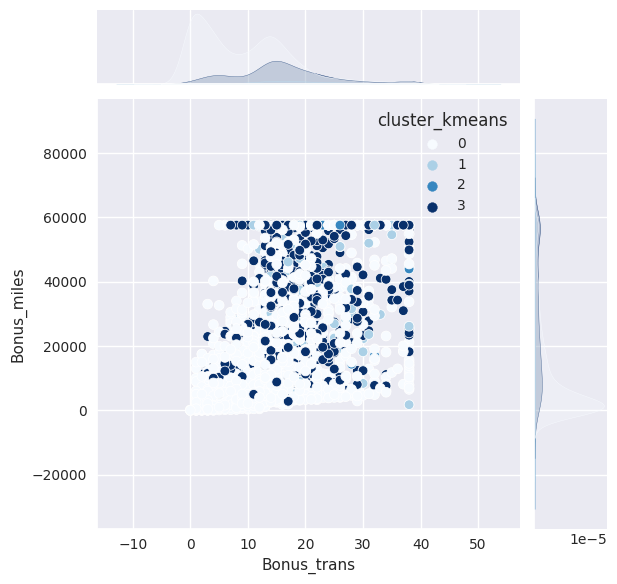

In [106]:
sns.jointplot(y ='Bonus_miles', x ='Bonus_trans', data = X , hue='cluster_kmeans', palette= "Blues")

We performed clustering using the EastWestAirlines dataset. Our aim is to try to identify passenger clusters with similar characteristics in order to target different segments for different distance offers. After various operations, we divided them into 10 different clusters. Our dataset consists of 3999 observations and 12 attributes